In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk



Data types:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Missing values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Summary statistics:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19

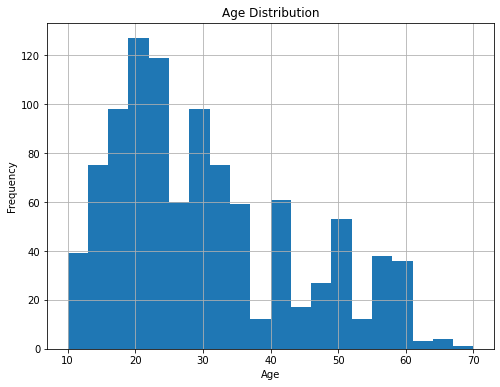

In [3]:
# Checking the data types of each column
print("\nData types:")
print(df.dtypes)

# Checking for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())

# Visualizing the distribution of numeric columns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

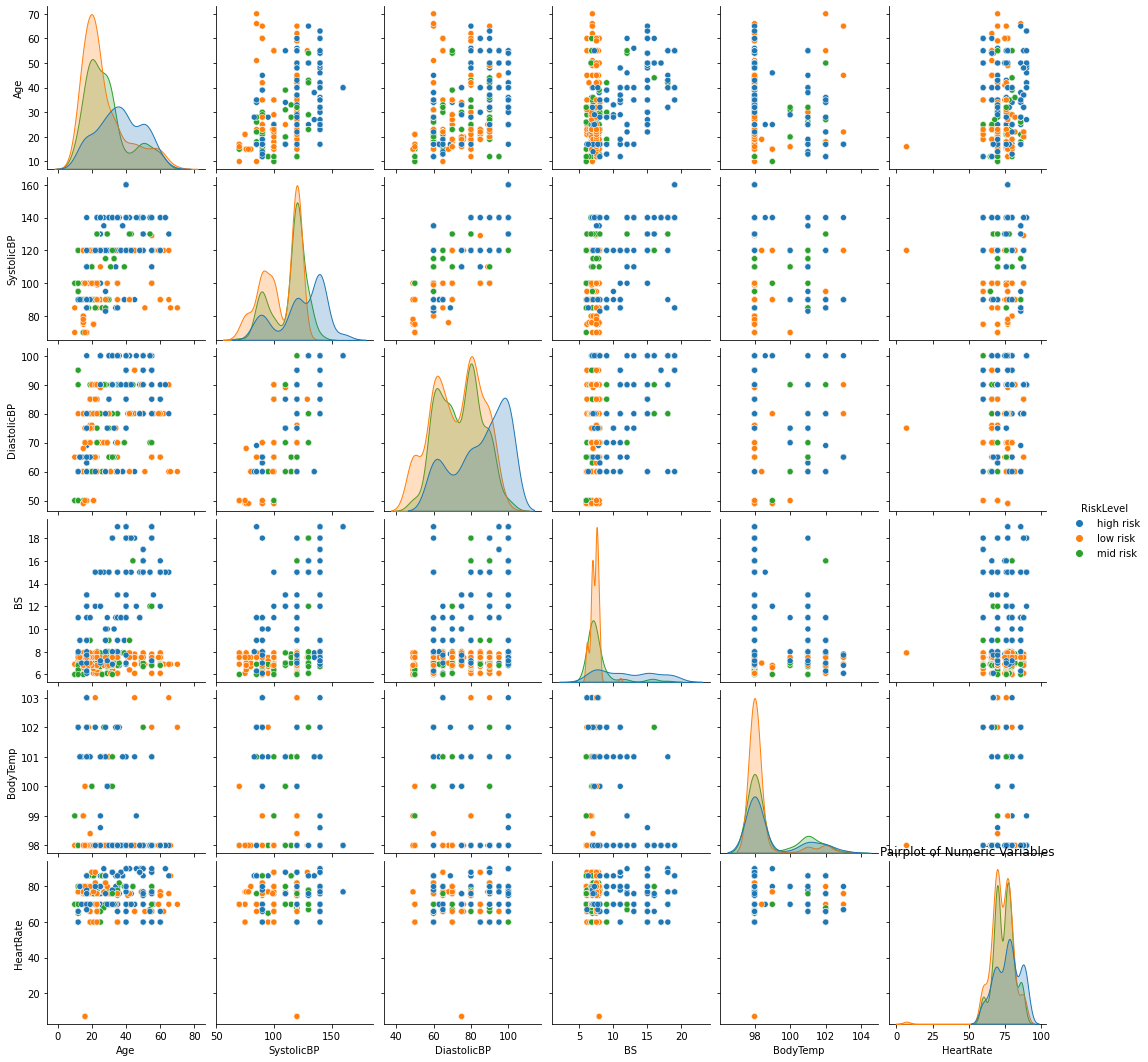

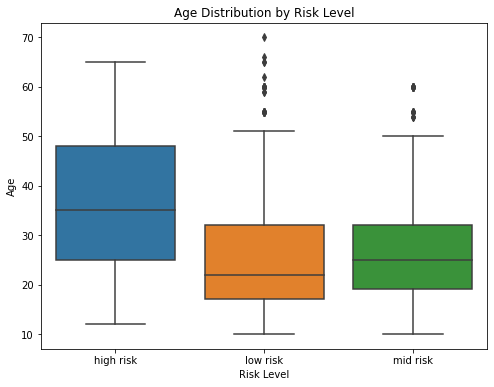

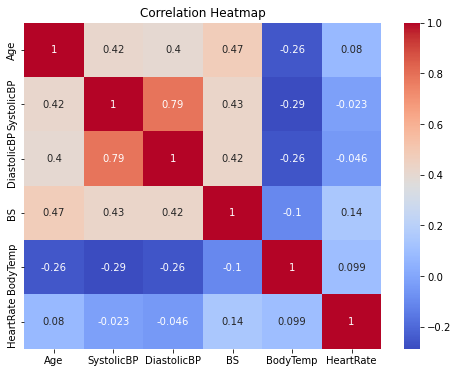

In [4]:
# Pairplot to visualize relationships between numeric variables
sns.pairplot(df, hue="RiskLevel")
plt.title('Pairplot of Numeric Variables')
plt.show()

# Boxplot to visualize the distribution of Age by RiskLevel
plt.figure(figsize=(8, 6))
sns.boxplot(x="RiskLevel", y="Age", data=df)
plt.title('Age Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.show()

# Correlation heatmap to visualize the relationships between numeric variables
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

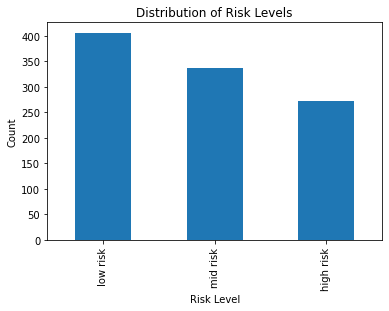

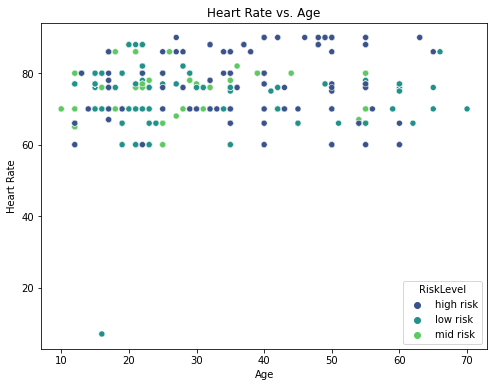

In [5]:
# Distribution of Risk Levels
risk_level_counts = df['RiskLevel'].value_counts()
risk_level_counts.plot(kind='bar')
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# Heart Rate vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='HeartRate', data=df, hue='RiskLevel', palette='viridis')
plt.title('Heart Rate vs. Age')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

# To count how many individuals fall into the "Prehypertension," "Hypertension," and "Normal" blood pressure categories

In [6]:
def categorize_blood_pressure(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return "Prehypertension"
    else:
        return "Hypertension"

# Applying the function to create a new column "BloodPressureCategory"
df['BloodPressureCategory'] = df.apply(lambda row: categorize_blood_pressure(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Displaying the updated DataFrame
print(df[['SystolicBP', 'DiastolicBP', 'BloodPressureCategory']])

      SystolicBP  DiastolicBP BloodPressureCategory
0            130           80       Prehypertension
1            140           90          Hypertension
2             90           70                Normal
3            140           85       Prehypertension
4            120           60       Prehypertension
...          ...          ...                   ...
1009         120           60       Prehypertension
1010         120           90       Prehypertension
1011          85           60                Normal
1012         120           90       Prehypertension
1013         120           65       Prehypertension

[1014 rows x 3 columns]


In [7]:
# Counting the number of individuals in each blood pressure category
blood_pressure_counts = df['BloodPressureCategory'].value_counts()

# Displaying the counts
print(blood_pressure_counts)

Prehypertension    542
Normal             343
Hypertension       129
Name: BloodPressureCategory, dtype: int64


In [8]:
# Defining age group boundaries and labels
age_bins = [0, 30, 40, 50, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50+']

# Creating a new column "AgeGroup" to store the age group categories
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Displaying the updated DataFrame
print(df[['Age', 'AgeGroup']])

      Age AgeGroup
0      25      <30
1      35    30-39
2      29      <30
3      30      <30
4      35    30-39
...   ...      ...
1009   22      <30
1010   55      50+
1011   35    30-39
1012   43    40-49
1013   32    30-39

[1014 rows x 2 columns]


In [9]:
# Counting the number of individuals in each age group
age_group_counts = df['AgeGroup'].value_counts()

# Displaying the count of individuals in each age group
print(age_group_counts)


<30      616
30-39    183
40-49    120
50+       95
Name: AgeGroup, dtype: int64


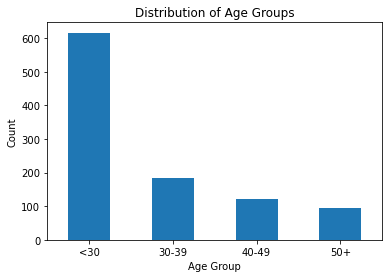

In [10]:
# Counting the number of individuals in each age group
age_group_counts = df['AgeGroup'].value_counts()

# Bar chart to visualize the age groups
age_group_counts.plot(kind='bar')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [11]:
# Grouping the DataFrame by 'AgeGroup' and 'RiskLevel' and count the occurrences
age_group_risk_counts = df.groupby(['AgeGroup', 'RiskLevel']).size().unstack(fill_value=0)

# Displaying the counts
print(age_group_risk_counts)

RiskLevel  high risk  low risk  mid risk
AgeGroup                                
<30               95       286       235
30-39             91        49        43
40-49             49        38        33
50+               37        33        25


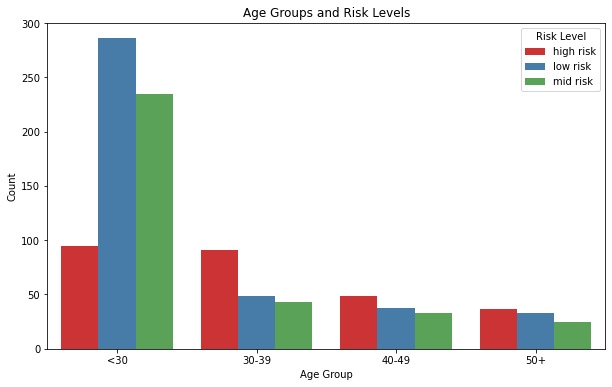

In [12]:
# Age group boundaries and labels
age_bins = [0, 30, 40, 50, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50+']

# Create a new column "AgeGroup" to store the age group categories
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# A bar chart to visualize age groups and risk levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='RiskLevel', palette='Set1')
plt.title('Age Groups and Risk Levels')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Risk Level')
plt.show()

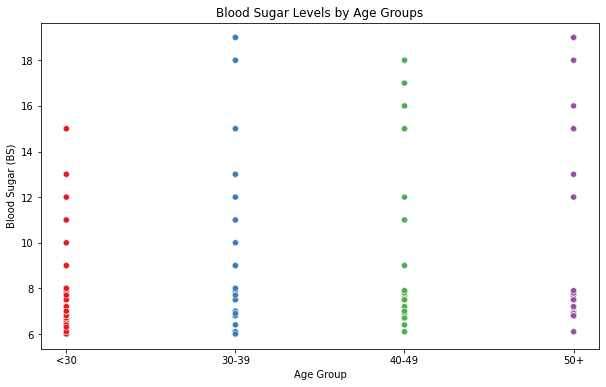

In [13]:
# Defining age group boundaries and labels
age_bins = [0, 30, 40, 50, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50+']

# Creating a new column "AgeGroup" to store the age group categories
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Creating a scatter plot to visualize blood sugar levels and age groups
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AgeGroup', y='BS', hue='AgeGroup', palette='Set1', legend=False)
plt.title('Blood Sugar Levels by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Blood Sugar (BS)')
plt.xticks(rotation=0)
plt.show()

In [14]:
#  Age group boundaries and labels
age_bins = [0, 30, 40, 50, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50+']

# Creating a new column "AgeGroup" to store the age group categories
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate the heart rate changes
df['HeartRateChange'] = df['HeartRate'].diff()

# Display the updated DataFrame
print(df[['AgeGroup', 'HeartRate', 'HeartRateChange']])

     AgeGroup  HeartRate  HeartRateChange
0         <30         86              NaN
1       30-39         70            -16.0
2         <30         80             10.0
3         <30         70            -10.0
4       30-39         76              6.0
...       ...        ...              ...
1009      <30         80             -8.0
1010      50+         60            -20.0
1011    30-39         86             26.0
1012    40-49         70            -16.0
1013    30-39         76              6.0

[1014 rows x 3 columns]


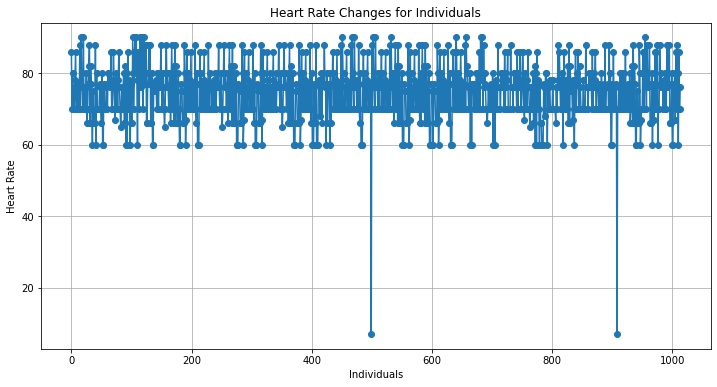

In [15]:
# Creating a line plot to visualize heart rate changes
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['HeartRate'], marker='o', linestyle='-')
plt.title('Heart Rate Changes for Individuals')
plt.xlabel('Individuals')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

# Logarithmic or Square Root Transformations

In [16]:
# Applying a logarithmic transformation to the 'SystolicBP' column.
df['Log_SystolicBP'] = np.log(df['SystolicBP'])

print(df[['SystolicBP', 'Log_SystolicBP']])

      SystolicBP  Log_SystolicBP
0            130        4.867534
1            140        4.941642
2             90        4.499810
3            140        4.941642
4            120        4.787492
...          ...             ...
1009         120        4.787492
1010         120        4.787492
1011          85        4.442651
1012         120        4.787492
1013         120        4.787492

[1014 rows x 2 columns]


In [17]:
# Applying a square root transformation to the 'DiastolicBP' column.
df['Sqrt_DiastolicBP'] = np.sqrt(df['DiastolicBP'])

print(df[['DiastolicBP', 'Sqrt_DiastolicBP']])

      DiastolicBP  Sqrt_DiastolicBP
0              80          8.944272
1              90          9.486833
2              70          8.366600
3              85          9.219544
4              60          7.745967
...           ...               ...
1009           60          7.745967
1010           90          9.486833
1011           60          7.745967
1012           90          9.486833
1013           65          8.062258

[1014 rows x 2 columns]


# Aggregated stats

In [18]:
# Age group boundaries and labels
age_bins = [0, 30, 40, 50, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50+']


df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate the average systolic blood pressure for each age group
average_systolic_bp_by_age = df.groupby('AgeGroup')['SystolicBP'].mean()

# Display the aggregated statistics
print(average_systolic_bp_by_age)

AgeGroup
<30      107.336039
30-39    122.404372
40-49    124.750000
50+      118.884211
Name: SystolicBP, dtype: float64


In [19]:
df['Age_SystolicBP'] = df['Age'] * df['SystolicBP']

# Display the updated DataFrame
print(df[['Age', 'SystolicBP', 'Age_SystolicBP']])

      Age  SystolicBP  Age_SystolicBP
0      25         130            3250
1      35         140            4900
2      29          90            2610
3      30         140            4200
4      35         120            4200
...   ...         ...             ...
1009   22         120            2640
1010   55         120            6600
1011   35          85            2975
1012   43         120            5160
1013   32         120            3840

[1014 rows x 3 columns]


In [20]:
age_bins = [0, 30, 40, 50, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Grouping the DataFrame by 'AgeGroup' and 'SystolicBP' and count the occurrences
age_systolic_bp_counts = df.groupby(['AgeGroup', 'SystolicBP']).size().unstack(fill_value=0)

print(age_systolic_bp_counts)

SystolicBP  70   75   76   78   80   83   85   90   95   99   100  110  115  \
AgeGroup                                                                      
<30           7    8   16    3    5    2   33  134   12    2   65   12    5   
30-39         0    0    0    0    0    0    7    4    0    0   18    5    3   
40-49         0    0    0    0    0    0    0    3    0    0    0    0    0   
50+           0    0    0    0    0    0    3   13    0    0    9    2    0   

SystolicBP  120  129  130  135  140  160  
AgeGroup                                  
<30         245    0   36    1   30    0  
30-39        94    0    0    2   40   10  
40-49        74    0   20    0   23    0  
50+          36    1    4    0   27    0  


In [21]:
age_bins = [0, 30, 40, 50, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_diastolic_bp_counts = df.groupby(['AgeGroup', 'DiastolicBP']).size().unstack(fill_value=0)

print(age_diastolic_bp_counts)

DiastolicBP  49   50   60   63   65   68   69   70   75   76   80   85   89   \
AgeGroup                                                                       
<30           25   24  130    8   59    2    1   73   32    3  129   34    1   
30-39          0    0   37    0    9    0    0   22    6    0   10    3    0   
40-49          0    0    3    0    0    0    0    0    0    0   67    0    0   
50+            0    0    4    0   19    0    0    5    0    0   20   12    0   

DiastolicBP  90   95   100  
AgeGroup                    
<30           66    4   25  
30-39         49   10   37  
40-49         24   12   14  
50+           14   10   11  


In [22]:
age_bins = [0, 30, 40, 50, float('inf')]
age_labels = ['<30', '30-39', '40-49', '50+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_bs_bodytemp_counts = df.groupby(['AgeGroup', 'BS', 'BodyTemp']).size().unstack(fill_value=0)

print(age_bs_bodytemp_counts)

BodyTemp       98.0   98.4   98.6   99.0   100.0  101.0  102.0  103.0
AgeGroup BS                                                          
<30      6.0       9      0      0      4      0      3      0      0
         6.1      16      0      0      0      0      0      2      2
         6.3       0      0      0      0      0      0      2      0
         6.4       6      0      0      0      0      0      0      0
         6.5       1      0      0      0      0      0      0      0
...              ...    ...    ...    ...    ...    ...    ...    ...
50+      15.0     21      0      0      0      0      0      0      0
         16.0      1      0      0      0      0      0      0      0
         17.0      0      0      0      0      0      0      0      0
         18.0      4      0      0      0      0      0      0      0
         19.0     10      0      0      0      0      0      0      0

[116 rows x 8 columns]


In [23]:
age_bs_bodytemp_counts

BodyTemp       98.0   98.4   98.6   99.0   100.0  101.0  102.0  103.0
AgeGroup BS                                                          
<30      6.0       9      0      0      4      0      3      0      0
         6.1      16      0      0      0      0      0      2      2
         6.3       0      0      0      0      0      0      2      0
         6.4       6      0      0      0      0      0      0      0
         6.5       1      0      0      0      0      0      0      0
...              ...    ...    ...    ...    ...    ...    ...    ...
50+      15.0     21      0      0      0      0      0      0      0
         16.0      1      0      0      0      0      0      0      0
         17.0      0      0      0      0      0      0      0      0
         18.0      4      0      0      0      0      0      0      0
         19.0     10      0      0      0      0      0      0      0

[116 rows x 8 columns]

In [24]:
# One-hot encoding for the 'RiskLevel' column
df_encoded = pd.get_dummies(df, columns=['RiskLevel'], prefix='Risk')

print(df_encoded)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  \
0      25         130           80  15.0      98.0         86   
1      35         140           90  13.0      98.0         70   
2      29          90           70   8.0     100.0         80   
3      30         140           85   7.0      98.0         70   
4      35         120           60   6.1      98.0         76   
...   ...         ...          ...   ...       ...        ...   
1009   22         120           60  15.0      98.0         80   
1010   55         120           90  18.0      98.0         60   
1011   35          85           60  19.0      98.0         86   
1012   43         120           90  18.0      98.0         70   
1013   32         120           65   6.0     101.0         76   

     BloodPressureCategory AgeGroup  HeartRateChange  Log_SystolicBP  \
0          Prehypertension      <30              NaN        4.867534   
1             Hypertension    30-39            -16.0        4.941642   
2  

In [25]:
df_encoded

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BloodPressureCategory,AgeGroup,HeartRateChange,Log_SystolicBP,Sqrt_DiastolicBP,Age_SystolicBP,Risk_high risk,Risk_low risk,Risk_mid risk
0,25,130,80,15.0,98.0,86,Prehypertension,<30,NaN,4.867534,8.944272,3250,1,0,0
1,35,140,90,13.0,98.0,70,Hypertension,30-39,-16.0,4.941642,9.486833,4900,1,0,0
2,29,90,70,8.0,100.0,80,Normal,<30,10.0,4.499810,8.366600,2610,1,0,0
3,30,140,85,7.0,98.0,70,Prehypertension,<30,-10.0,4.941642,9.219544,4200,1,0,0
4,35,120,60,6.1,98.0,76,Prehypertension,30-39,6.0,4.787492,7.745967,4200,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,Prehypertension,<30,-8.0,4.787492,7.745967,2640,1,0,0
1010,55,120,90,18.0,98.0,60,Prehypertension,50+,-20.0,4.787492,9.486833,6600,1,0,0
1011,35,85,60,19.0,98.0,86,Normal,30-39,26.0,4.442651,7.745967,2975,1,0,0
1012,43,120,90,18.0,98.0,70,Prehypertension,40-49,-16.0,4.787492,9.486833,5160,1,0,0


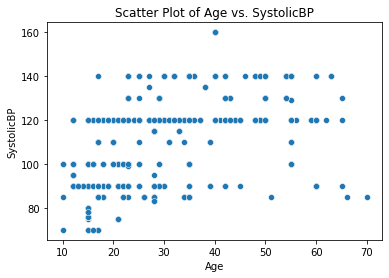

In [26]:
sns.scatterplot(data=df, x='Age', y='SystolicBP')
plt.title('Scatter Plot of Age vs. SystolicBP')
plt.show()

In [27]:
from scipy.stats import f_oneway

age_groups = ['<30', '30-39', '40-49', '50+']
systolic_bp_by_age = [df[df['AgeGroup'] == age]['SystolicBP'] for age in age_groups]

# One-way ANOVA
f_statistic, p_value = f_oneway(*systolic_bp_by_age)

alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference in SystolicBP among age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in SystolicBP among age groups.")

Reject the null hypothesis. There is a significant difference in SystolicBP among age groups.


In [28]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Performing Tukey's HSD test for SystolicBP among age groups

# Fit a one-way ANOVA model
model = sm.formula.ols('SystolicBP ~ AgeGroup', data=df).fit()

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df['SystolicBP'], groups=df['AgeGroup'], alpha=0.05)

print(tukey_result.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 30-39  40-49   2.3456 0.6372  -2.7528   7.4441  False
 30-39    50+  -3.5202 0.3509  -9.0088   1.9685  False
 30-39    <30 -15.0683    0.0 -18.7225 -11.4141   True
 40-49    50+  -5.8658 0.0557 -11.8265   0.0949  False
 40-49    <30  -17.414    0.0  -21.745 -13.0829   True
   50+    <30 -11.5482    0.0 -16.3324  -6.7639   True
------------------------------------------------------


In [29]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Encoding the 'RiskLevel' column
risk_level_encoded = one_hot_encoder.fit_transform(df['RiskLevel'].values.reshape(-1, 1))

risk_level_df = pd.DataFrame(risk_level_encoded, columns=one_hot_encoder.get_feature_names(['RiskLevel']))

# Concatenating the one-hot encoded 'RiskLevel' DataFrame with the original DataFrame
df_encoded = pd.concat([df, risk_level_df], axis=1)

df_encoded.drop('RiskLevel', axis=1, inplace=True)

C:\Users\Henry Morgan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('SystolicBP', axis=1)  # Features
y = df_encoded['SystolicBP']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
missing_values = X_train.isna().sum()
print(missing_values)

Age                      0
DiastolicBP              0
BS                       0
BodyTemp                 0
HeartRate                0
BloodPressureCategory    0
AgeGroup                 0
HeartRateChange          1
Log_SystolicBP           0
Sqrt_DiastolicBP         0
Age_SystolicBP           0
RiskLevel_high risk      0
RiskLevel_low risk       0
RiskLevel_mid risk       0
dtype: int64


In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the 'HeartRateChange' column
X_train['HeartRateChange'] = imputer.fit_transform(X_train['HeartRateChange'].values.reshape(-1, 1))

In [33]:
missing_values = X_train.isna().sum()
print(missing_values)

Age                      0
DiastolicBP              0
BS                       0
BodyTemp                 0
HeartRate                0
BloodPressureCategory    0
AgeGroup                 0
HeartRateChange          0
Log_SystolicBP           0
Sqrt_DiastolicBP         0
Age_SystolicBP           0
RiskLevel_high risk      0
RiskLevel_low risk       0
RiskLevel_mid risk       0
dtype: int64


In [34]:
# One-hot encode the 'BloodPressureCategory' column
X_train = pd.get_dummies(X_train, columns=['BloodPressureCategory'], prefix=['BP'])

In [35]:
age_mapping = {'child': 1, 'teen': 2, 'adult': 3, 'senior': 4}
X_train['AgeGroup'] = X_train['AgeGroup'].map(age_mapping)

In [36]:
X_train = pd.get_dummies(X_train, columns=['AgeGroup'], prefix=['AgeGroup'])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
# Preprocessing the test data (assuming X_test is your test data)
X_test = pd.get_dummies(X_test, columns=['BloodPressureCategory'], prefix=['BP'])
X_test['AgeGroup'] = X_test['AgeGroup'].map(age_mapping)
X_test = pd.get_dummies(X_test, columns=['AgeGroup'], prefix=['AgeGroup'])
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Making predictions
y_pred = model.predict(X_test_scaled)

In [40]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 1.1553785735206223


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Defining the hyperparameter grid to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge regression model
ridge = Ridge()

# GridSearchCV object with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameter value from the search
best_alpha = grid_search.best_params_['alpha']

# Training the final model with the best hyperparameter
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_scaled, y_train)

# Making predictions on the test data
X_test_scaled = scaler.transform(X_test)
y_pred = final_model.predict(X_test_scaled)

# Evaluating the final model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Best Alpha: {best_alpha}")
print(f"RMSE with Best Alpha: {rmse}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Alpha: 0.001
RMSE with Best Alpha: 1.1553295047566035


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Linear regression model
model = LinearRegression()

# Defining the number of splits for cross-validation
num_splits = 5

# Cross-validation strategy
cross_val_strategy = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Performing cross-validation and calculate RMSE for each fold
rmse_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_root_mean_squared_error', cv=cross_val_strategy)

# Calculating the mean RMSE across all folds
mean_rmse = -rmse_scores.mean()

print("RMSE Scores for each fold:")
print(-rmse_scores)
print(f"Mean RMSE: {mean_rmse}")

RMSE Scores for each fold:
[0.99403617 1.06370855 1.03772068 1.08139698 1.01365741]
Mean RMSE: 1.0381039565637158
